In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

### Load data

In [2]:
df=pd.read_csv(r"C:\Users\rakhi\Downloads\INvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


### Describe data

In [3]:
df.shape

(37352, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [5]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

#### Inference
* Dataframe have 16 columns
* Dataframe have 37352 rows
* Total categorical columns are 8 columns
* Total numerical columns are 8 columns
* views column is the target for this dataset

## Exploratory Data Analysis

In [6]:
#separation of categorical and numerical value
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description']
nums = ['category_id','views','likes','dislikes','comment_count']

In [7]:
df[nums].describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


The distribution of data for features views, likes, dislikes, comment_count looks skewed since mean & median are not close enough.

In [8]:
df[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,37352,37352,37352,37352,37352,37352,37352,37352,36791
unique,205,16721,1426,16339,12578,2,2,2,13992
top,18.20.01,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,200,19,284,18,1381,36148,36571,37341,166


### Univariate Analysis

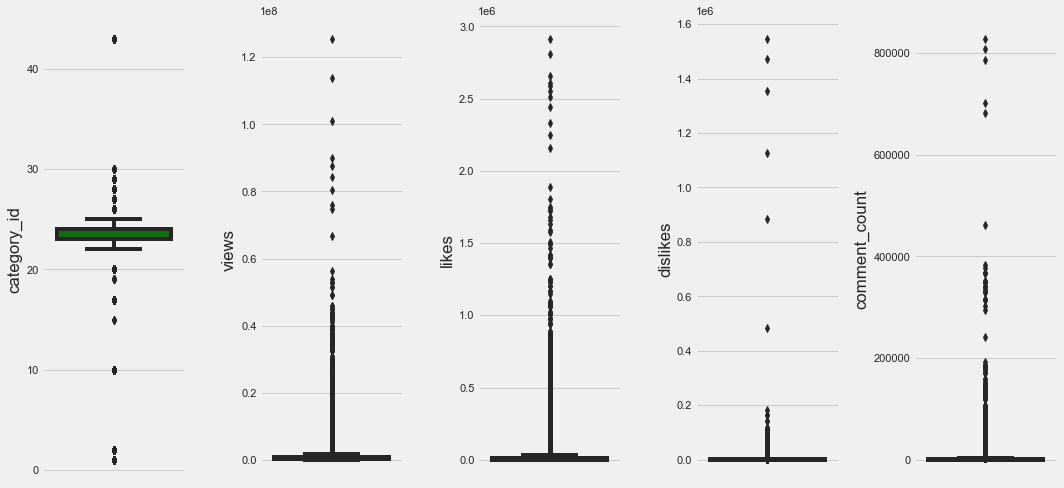

In [9]:
features = ['category_id','views','likes','dislikes','comment_count']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout();

It can be seen in the boxplot graph above that the view, likes, dislikes, comment_count features have many outliers. So, logarithmic transformations are needed for these features.

<Figure size 1152x576 with 0 Axes>

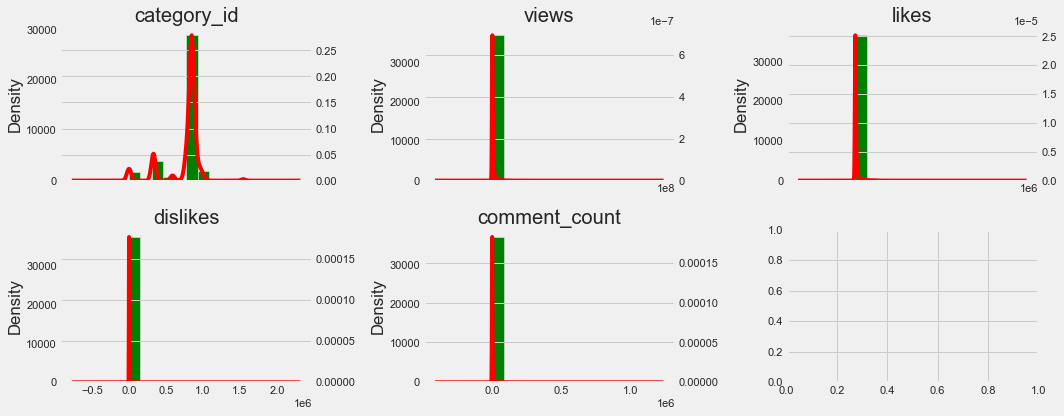

In [10]:
#distribution
plt.suptitle("Distribution of numerical features",fontsize=20)
data_num = df[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout();

### Bivariate analysis

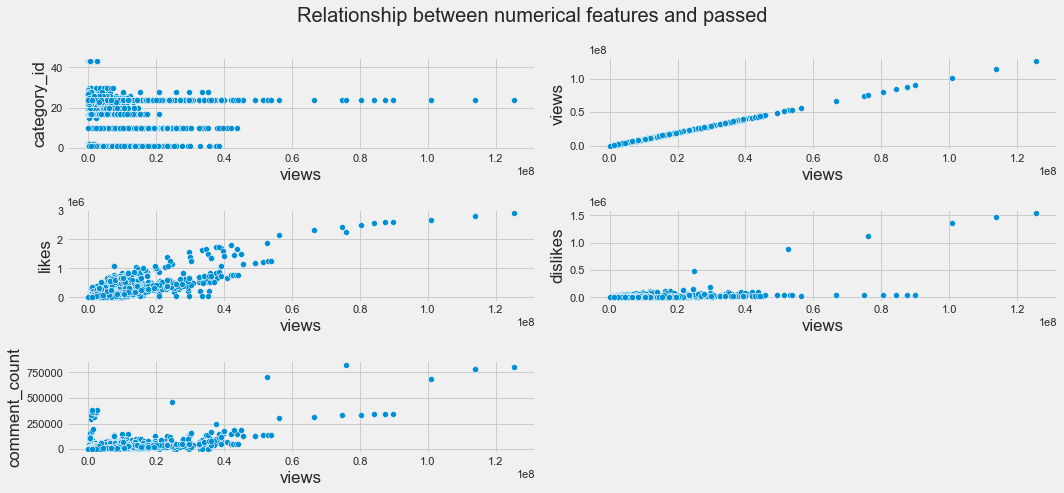

In [11]:
plt.figure(figsize=(15, 7))
plt.suptitle("Relationship between numerical features and passed",fontsize=20)
for i, j in enumerate(features):
    plt.subplot(3,2, i+1)
    sns.scatterplot(y=df[j],x=df["views"],palette="hls")                    
    plt.tight_layout();

### Multivariate analysis

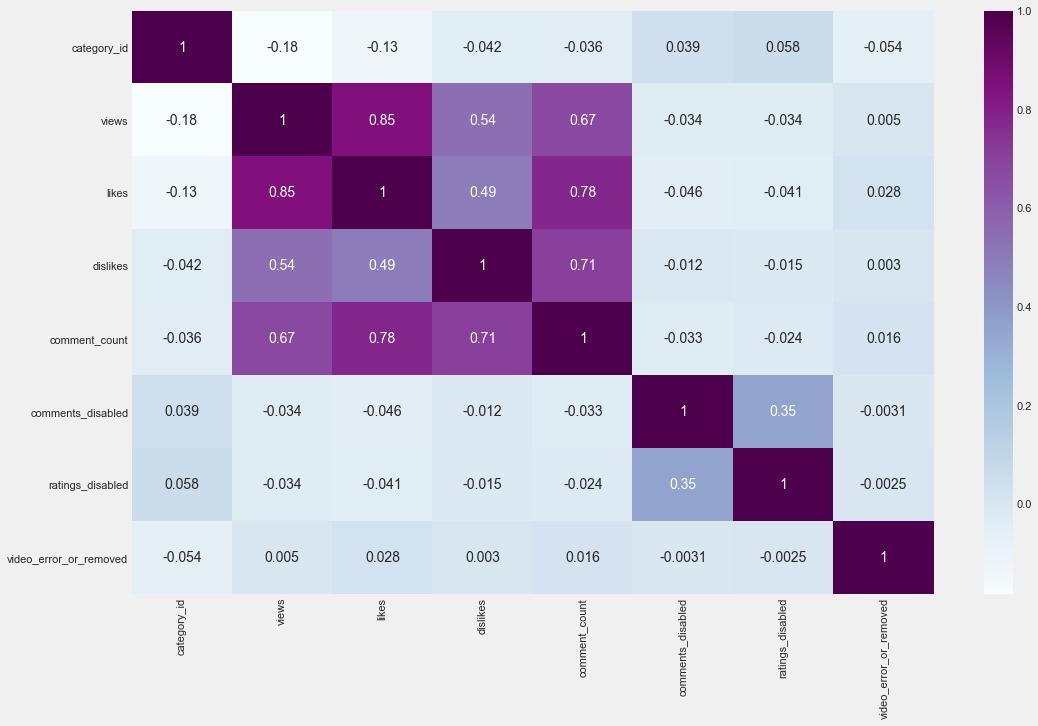

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap = "BuPu");

There are 3 features that have a strong positive correlation to views, namely the likes, dislikes, and comment_count features.

<Figure size 720x576 with 0 Axes>

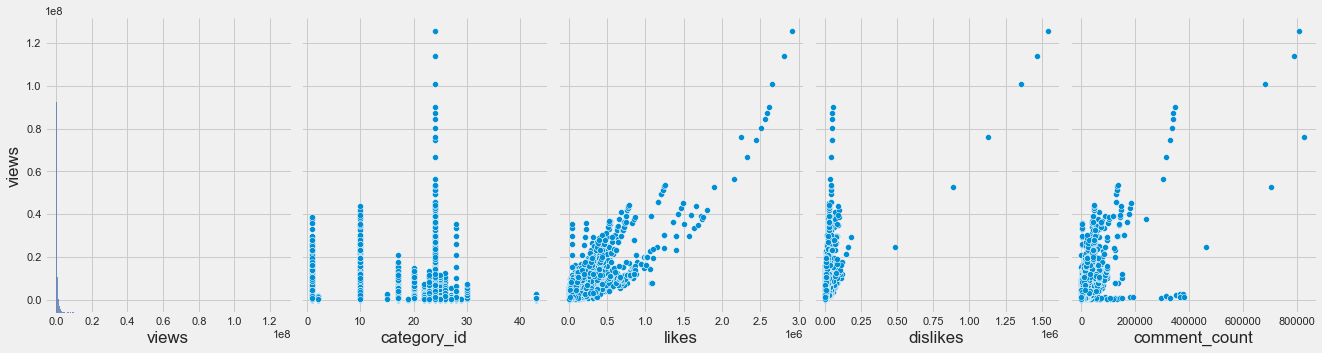

In [13]:
#create a pairplot graph from each numeric data
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['views','category_id','likes','dislikes','comment_count'], y_vars=['views'], height=5, aspect=0.75);
fig.tight_layout();

In some boxplot charts, it can be seen that the data distribution is uneven and has lots of outliers. When we look at the heatmap, we can see that there are several features that are positively correlated with the views of a video, such as likes, dislikes, comment_count. So, some of these features are of feature importance for doing machine learning modeling

### Detection and handling of missing values

In [14]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [15]:
df.nunique()

video_id                  16307
trending_date               205
title                     16721
channel_title              1426
category_id                  17
publish_time              16339
tags                      12578
views                     32136
likes                     15529
dislikes                   5079
comment_count              6027
thumbnail_link            16523
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13992
dtype: int64

publish_time, description, tags, title, channel_title features are removed because they have a very large number of unique values. So, it is assumed that each row of data has a different value.

In [16]:
#dropping category_id, publish_date, description, tags, title, channel_title
data_clean = df.drop(['description','title','channel_title','tags','publish_time'], axis=1)

In [17]:
data_clean.head()

,video_id,trending_date,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,kzwfHumJyYc,17.14.11,1,1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False
1,zUZ1z7FwLc8,17.14.11,25,590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False
2,10L1hZ9qa58,17.14.11,24,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False
3,N1vE8iiEg64,17.14.11,23,1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False
4,kJzGH0PVQHQ,17.14.11,24,464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False


#### Duplicate Values

In [18]:
data_clean.duplicated().sum()

4263

In [19]:
data_clean = data_clean.drop_duplicates()

In [20]:
data_clean.duplicated().sum()

0

#### Outliers handling

Text(0.5, 0, '')

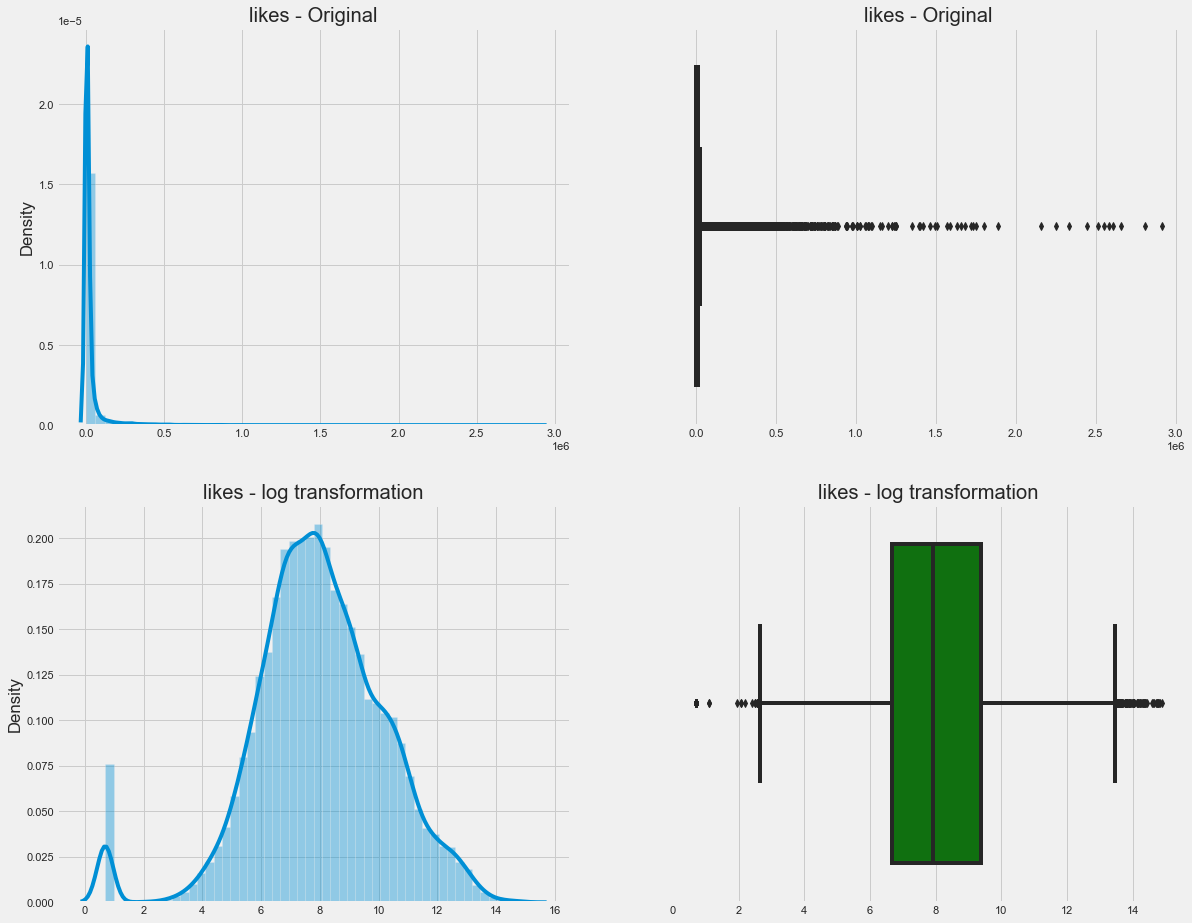

In [21]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

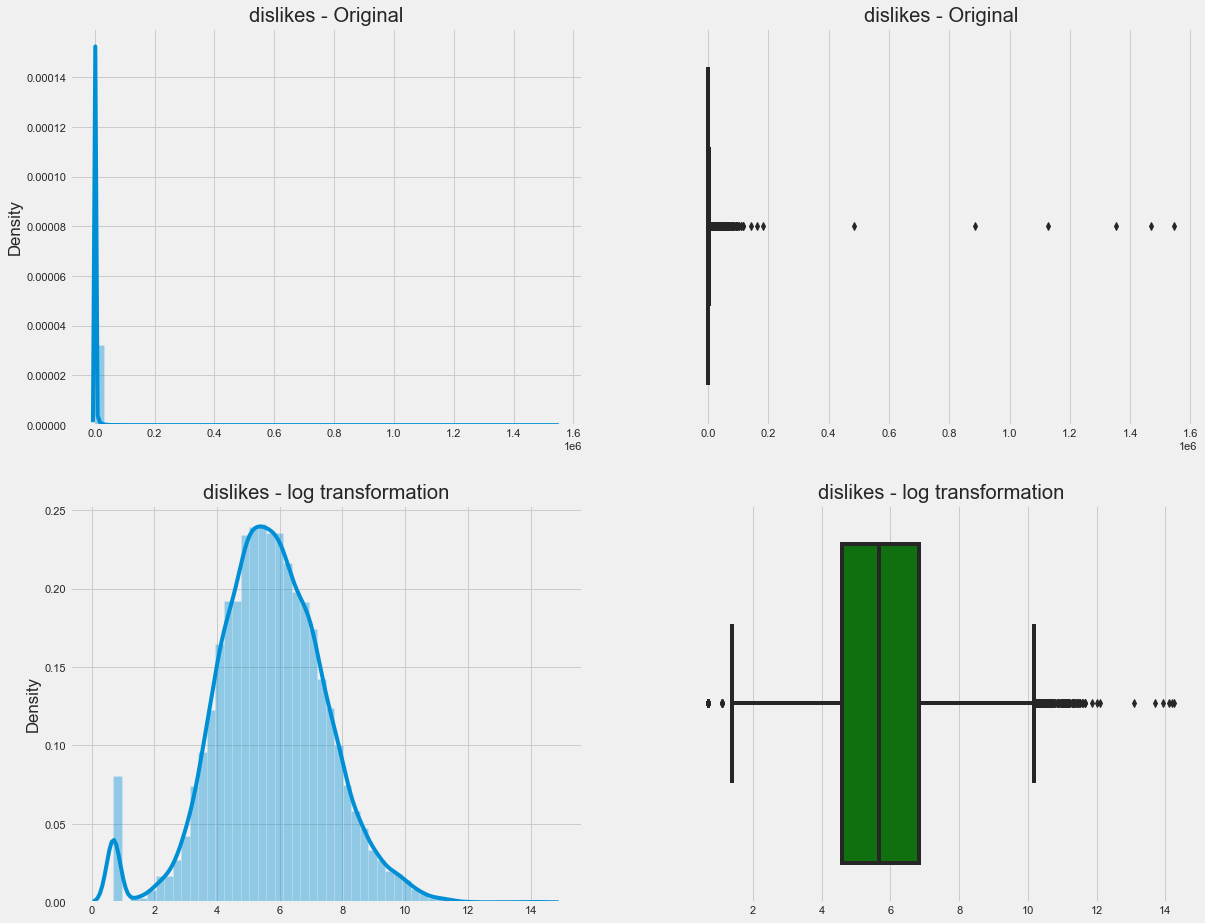

In [22]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

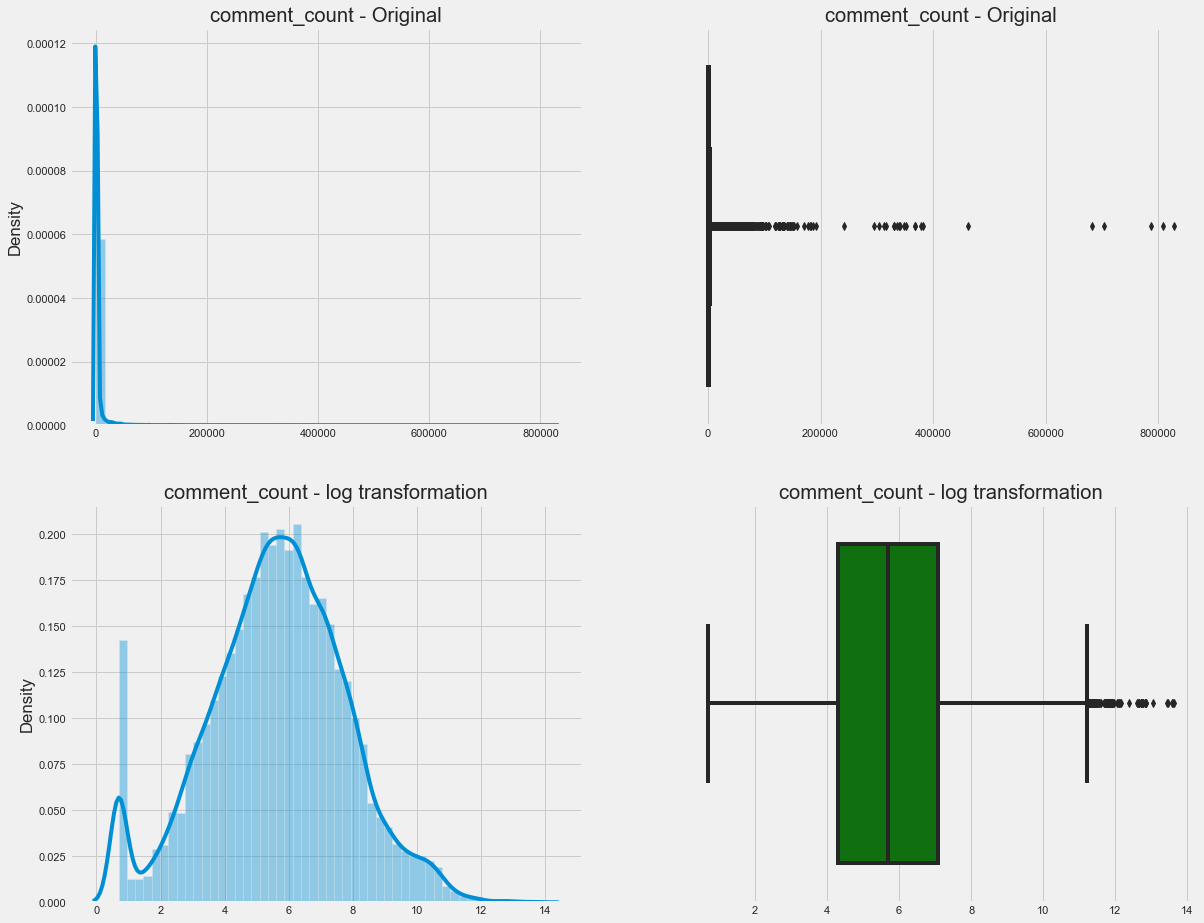

In [23]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

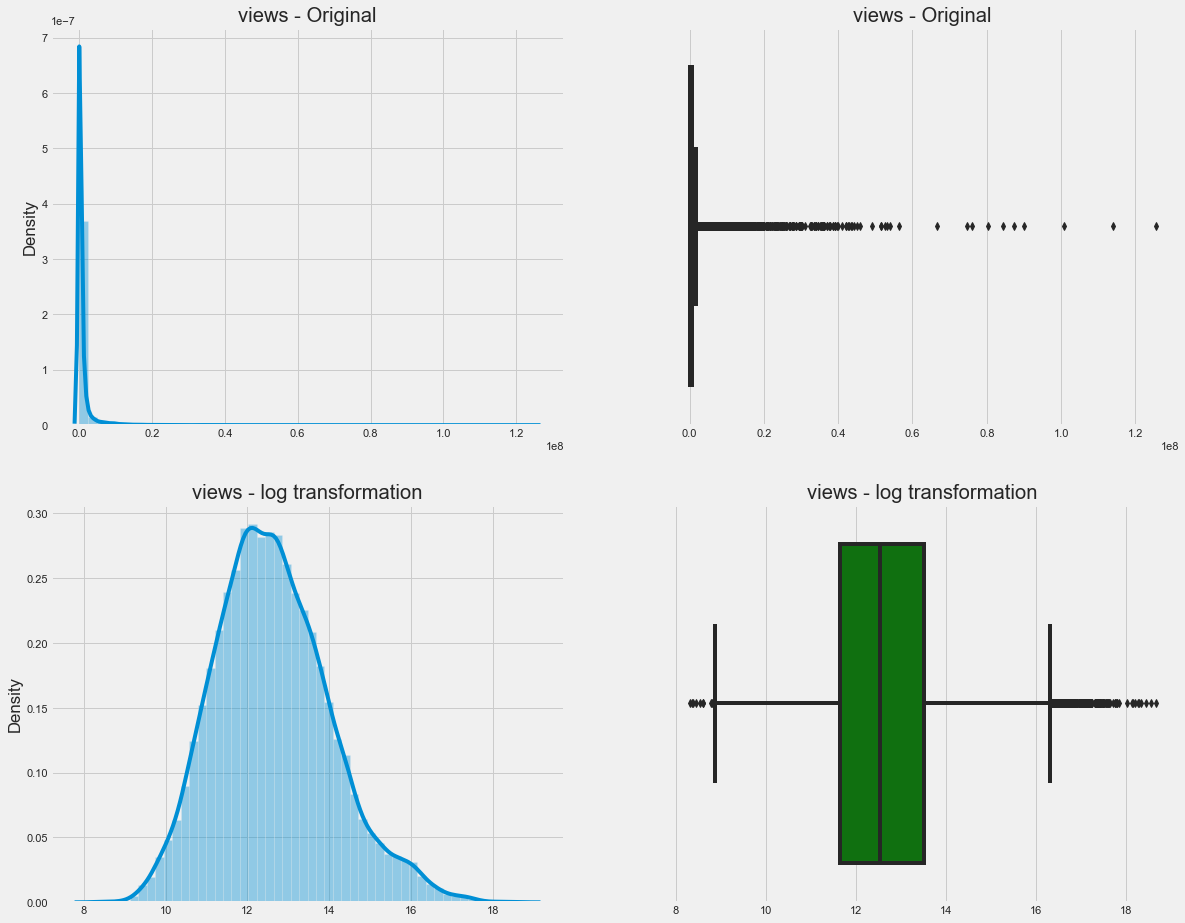

In [24]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

#### Normalization

In [25]:
features = ['category_id','views','likes','dislikes','comment_count']
df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

In [26]:
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [27]:
data_clean.describe()

,category_id,views,likes,dislikes,comment_count
count,33089.000000,3.308900e+04,3.308900e+04,3.308900e+04,33089.000000
mean,21.628154,9.963425e+05,2.558762e+04,1.576535e+03,2524.777660
std,6.493615,3.148111e+06,9.647320e+04,1.689573e+04,14769.825108
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000
25%,23.000000,1.127190e+05,7.870000e+02,9.800000e+01,72.000000
50%,24.000000,2.750270e+05,2.757000e+03,2.890000e+02,298.000000
75%,24.000000,7.320220e+05,1.201100e+04,9.320000e+02,1169.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000


In [28]:
df_pre.head()

,video_id,trending_date,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,...,log_category_id,log_views,log_likes,log_dislikes,log_comment_count,std_category_id,std_views,std_likes,std_dislikes,std_comment_count
0,kzwfHumJyYc,17.14.11,1,1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,...,0.693147,13.907477,10.433145,6.683361,6.783325,0.000000,0.008709,0.011661,0.000516,0.001066
1,zUZ1z7FwLc8,17.14.11,25,590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,...,3.258097,13.288051,6.601230,6.807935,0.000000,0.571429,0.004673,0.000252,0.000585,0.000000
2,10L1hZ9qa58,17.14.11,24,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,...,3.218876,13.068939,7.606885,5.497168,5.010635,0.547619,0.003747,0.000690,0.000157,0.000180
3,N1vE8iiEg64,17.14.11,23,1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,...,3.178054,14.032782,11.161295,7.393263,7.895436,0.523810,0.009875,0.024154,0.001051,0.003243
4,kJzGH0PVQHQ,17.14.11,24,464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,...,3.218876,13.047674,6.200509,5.683580,4.204693,0.547619,0.003667,0.000169,0.000190,0.000080


The transformation log is carried out on features with numerical data values to convert them to normal / almost normal distributions, this is done because there are several features that have a skewed data distribution.

We normalized so that the scale of each numeric feature has the same scale.

## Split Train & Test Data

<AxesSubplot:>

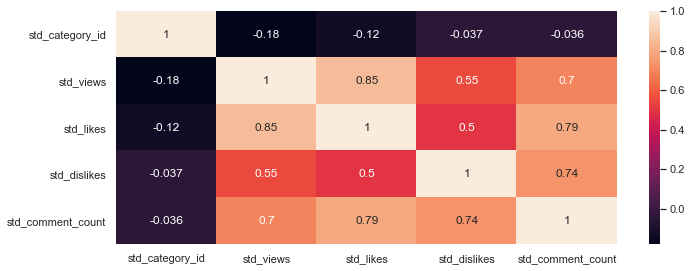

In [29]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_category_id','std_views','std_likes','std_dislikes','std_comment_count',]].corr(), annot=True)

In [30]:
x = df_pre[['std_category_id','std_likes','std_dislikes','std_comment_count']] 
y = df_pre['std_views']

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

### Simple Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [33]:
pred = lr.predict(xtest)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) 
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytest, pred))

In [36]:
eval_regression(lr, pred, xtrain, ytrain, xtest,ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.76


### Ridge Regression Model

In [37]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [38]:
pred = ridge_model.predict(xtest)
eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.76


In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [40]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.02
R2 score: 0.23


### Lasso Regression Model

In [41]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

Lasso()

In [42]:
pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.02
R2 score: -0.00


In [43]:
alpha = [0.02, 0.024, 0.025, 0.026, 0.03] 
hyperparameters = dict(alpha=alpha)
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')
best_model = clf.fit(xtrain, ytrain)

In [44]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.76


 ### Decision Tree Model

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [46]:
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.82


### Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [48]:
pred = dt.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.82


In [49]:
rf = RandomForestRegressor(random_state=140)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.89


Text(0.5, 1.0, 'feature importance score')

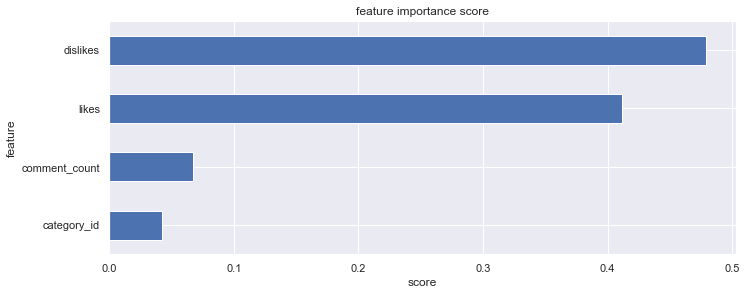

In [50]:
X=df[['category_id','likes','dislikes','comment_count']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Random Forest with MAE 0.00, RMSE 0.01, and R2 of 0.89 makes Random Forest the best model so far

Decision Tree is the second best sequence model after Random Forest with a slightly smaller R2 value of 0.82